<a href="https://colab.research.google.com/github/harshithap2000/Text-Classification-and-Sentiment-Analysis-of-Hotel-Reviews-/blob/main/Text_Classification_and_Sentiment_Analysis_of_Hotel_Reviews_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Reading datasets

First, I loaded the dataset into a pandas DataFrame. Then, I combined the `title` and `text` columns to create a new column named `review`.

To clean the data, I removed any non-alphanumeric characters using regular expressions and tokenized the text. For tokenization, I utilized the NLTK's  `word_tokenize` function.

Subsequently, I split the dataset into training, development, and testing sets for model training and evaluation purposes. The training set contains the first 10,000 entries, the development set contains the next 10,000 entries, and the testing set contains the remaining entries.

In [ ]:
# Importing required libraries
import json
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords
import regex as re

# Downloading necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Loading the dataset
df = pd.read_json("/content/random_30000_hotel_reviews.JSON", lines=True)

# Concatenating the "title" and "text" fields into a single "review" field
df['review'] = df['title'] + " " + df['text']

def clean_text(text):
    # Removing all non-alphanumeric characters using regex
    text = re.sub('[^a-zA-Z]', ' ', text)  # (Stack Overflow, 2022)

    # Tokenizing the text
    tokens = word_tokenize(text)

    return tokens

# Creating a new "tokens" column after performing text cleaning
df["tokens"] = df["review"].apply(clean_text)

# Splitting the data into training, development, and testing datasets
train_data = df[:10000]
dev_data = df[10000:20000]
test_data = df[20000:]

# Displaying the first few rows of the DataFrame
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,review,tokens
0,"{'service': 1.0, 'cleanliness': 2.0, 'overall'...",“Horrible experience”,First of all we got there and they didn't have...,"{'username': 'Kh3RD', 'num_reviews': 1, 'id': ...",September 2012,80138,0,2012-09-19,140716137,False,“Horrible experience” First of all we got ther...,"[Horrible, experience, First, of, all, we, got..."
1,"{'cleanliness': 1.0, 'sleep_quality': 1.0, 'ov...",“Stay Away”,Found Racist graffiti in the room. Request to ...,"{'username': 'TheUglyPhotographer', 'num_citie...",June 2011,240151,1,2011-06-27,114807323,False,“Stay Away” Found Racist graffiti in the room....,"[Stay, Away, Found, Racist, graffiti, in, the,..."
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great location and service”,Close to Union Square - hotel is a bit of a ma...,"{'username': 'Moonstonemoclips', 'num_cities':...",October 2010,80793,0,2010-10-25,84805430,False,“Great location and service” Close to Union Sq...,"[Great, location, and, service, Close, to, Uni..."
3,"{'service': 3.0, 'cleanliness': 2.0, 'overall'...",“I will never go back here again!”,I had a bad vibe about this place from the mom...,"{'username': 'JoanellenJ', 'num_cities': 10, '...",June 2012,111418,1,2012-06-28,132971117,False,“I will never go back here again!” I had a bad...,"[I, will, never, go, back, here, again, I, had..."
4,{'overall': 1.0},“Ripped off our VISA card after departure”,"After we received our ""final"" bill and left th...","{'username': 'Lynnworks', 'num_cities': 3, 'nu...",January 2012,671150,3,2012-02-04,124104157,False,“Ripped off our VISA card after departure” Aft...,"[Ripped, off, our, VISA, card, after, departur..."


Moving forward, additional preprocessing steps such as lowercase conversion, stopword removal, and lemmatization are proposed to further refine the text data. These steps aim to standardize word forms, reduce noise, and enhance the quality of feature representation for downstream NLP tasks.



### 2. Exploratory Data Analysis (EDA)

I've extracted the `overall` ratings from the `ratings` column of the development dataset (`dev_data`).

The frequency of each rating is calculated using `Counter` from the collections module and the distribution is visualized using a bar plot with `Matplotlib`.

Dataset's sentiment distribution and potential class imbalance can be looked into from the above plot.

Next I've concatenated tokens into a single string and then splits the string into individual words. Using this I've calculated the number of unique words in the vocabulary using the `set` function.

The richness and diversity of the vocabulary within the dataset is understood by doing so, which is essential for feature engineering and model training.



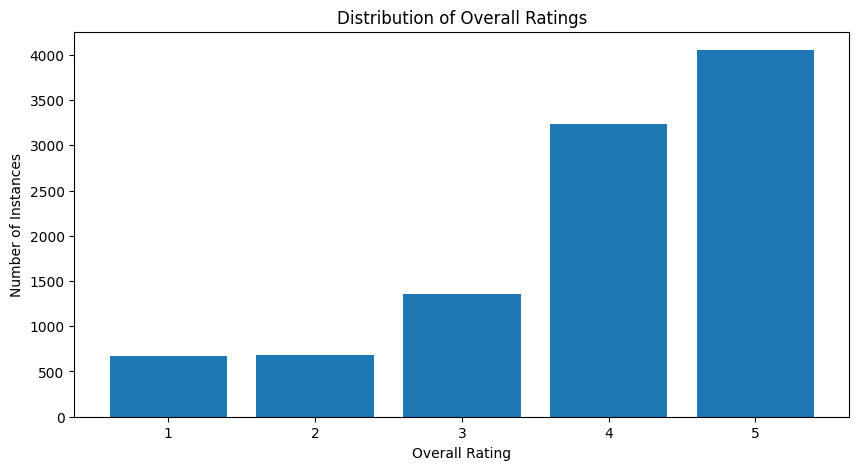

Number of Unique Words: 116


,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,review,tokens,sentiment
10000,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Nice hotel - great location”,This was a nice hotel for the price I got at t...,"{'username': 'metalchicRichmond', 'num_cities'...",July 2011,84107,0,2012-05-04,129367971,False,“Nice hotel - great location” This was a nice ...,“ N c e h e l - g r e l c n ” T ...,positive
10001,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Perfect location and the room was generous in...,I stayed in this hotel in December of 2010 and...,"{'username': 'Noelle20', 'num_reviews': 1, 'id...",February 2011,93464,0,2011-02-15,96767715,False,“Perfect location and the room was generous in...,“ P e r f e c l c n n h e r w g ...,positive
10002,"{'service': 1.0, 'cleanliness': 4.0, 'overall'...","“Rude staff, extra charges, overall unimpressive”",We traveled here with a big group for a weddin...,"{'username': 'amanduhcorazon', 'num_cities': 4...",September 2011,109008,3,2011-09-23,118469580,False,"“Rude staff, extra charges, overall unimpressi...","“ R u e f f , e x r c h r g e , ...",negative
10003,"{'service': 4.0, 'cleanliness': 4.0, 'overall'...","“Great location, would stay here again”",Stayed here for 3 nights. Our room was a large...,"{'username': 'Peter G', 'num_cities': 6, 'num_...",November 2011,223019,2,2011-11-14,120569971,False,"“Great location, would stay here again” Stayed...","“ G r e l c n , w u l h e r e g ...",positive
10004,"{'service': 3.0, 'cleanliness': 4.0, 'overall'...",“Disappointed in Chicago”,I stayed at the Allerton Hotel on the night of...,"{'username': 'redinked', 'num_cities': 12, 'nu...",August 2012,90973,1,2012-08-16,137342764,False,“Disappointed in Chicago” I stayed at the Alle...,“ D p p n e n C h c g ” I e h ...,positive


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Extracting overall ratings
ratings = dev_data['ratings'].apply(lambda x: x.get('overall', 0))

# Rating Distribution (using ratings if available)
if 'ratings' in dev_data.columns:
    rating_freq = Counter(ratings)
    plt.figure(figsize=(10, 5))
    plt.bar(rating_freq.keys(), rating_freq.values())
    plt.title('Distribution of Overall Ratings')
    plt.xlabel('Overall Rating')
    plt.ylabel('Number of Instances')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("'ratings' column not found. Skipping rating distribution analysis.")

# Combining preprocessed reviews into a single string
all_reviews = dev_data["tokens"].apply(lambda x: " ".join(x))
all_reviews_str = " ".join(all_reviews)
words = all_reviews_str.split()

# Calculating the number of unique words
unique_words = set(words)  # (Sharris, 2018)
num_unique_words = len(unique_words)

print("Number of Unique Words:", num_unique_words)

# Displaying the first few rows of the DataFrame
dev_data.head()

From the bar plot, we can see that majority of reviews are inclining towards positive review.

Moving forward we need to  conduct a descriptive analysis of the dataset also we need to focus on text preprocessing.

Techniques such as converting text to lowercase, removing stopwords, and applying lemmatization or stemming can help improve the quality of the text data.

Once the text data is preprocessed, we need to  explore feature engineering techniques to extract relevant features. This may involve creating n-grams, incorporating part-of-speech tags, computing sentiment scores, or generating word embeddings.

### 3. Preprocessing

To start, I imported the necessary libraries such as pandas for data manipulation, sklearn for machine learning tools, and NLTK for natural language processing tasks. Then, I downloaded the NLTK words corpus for language detection.

I created a function called `find_non_english_words` to detect non-English words in a list of tokens. This function utilizes NLTK's `wordpunct_tokenize` method to tokenize the text and identify non-English words.

Next, I applied the `find_non_english_words` function to the 'review' column of the development dataset (`dev_data`). This step helped remove non-English reviews from the dataset, ensuring the text data is suitable for further analysis.

Following that, I defined a function `get_sentiment_label` to assign sentiment labels (positive or negative) based on the overall rating. Reviews with a rating of 3 or higher were labeled as positive, while those below 3 were labeled as negative.

I then separated the positive and negative reviews and performed upsampling on the negative reviews to balance the dataset. This ensured an equal representation of both positive and negative sentiments, which is essential for training unbiased sentiment analysis models.

Subsequently, I concatenated the balanced positive and negative reviews into a single dataframe and shuffled the data to prevent any inherent biases in the ordering.

After balancing the dataset, I applied text preprocessing techniques to the 'tokens' column. This involved removing stopwords and lemmatizing the tokens to standardize the text representations and reduce noise in the data.

Finally, I applied the preprocessing function to the 'tokens' column, completing the preprocessing pipeline for the text data. Each step in the preprocessing pipeline was executed to ensure the text data is clean and ready for sentiment analysis or any other NLP tasks.

In [ ]:
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

# Function to detect non-English words in a list of tokens
def find_non_english_words(tokens): # (Alpha, 2016)
    return " ".join(w for w in nltk.wordpunct_tokenize(tokens))

# Removing non-English reviews
dev_data['tokens'] = dev_data['review'].apply(find_non_english_words)

# Function to label sentiment based on overall ratings
def get_sentiment_label(rating):
  if rating >= 3:
    return "positive"
  else:
    return "negative"

# Applying the 'get_sentiment_label' function to create a new column 'sentiment' based on the ratings
dev_data["sentiment"] = dev_data["ratings"].apply(lambda x: get_sentiment_label(x.get("overall", 0)))

# Separating positive and negative reviews
positive_reviews = dev_data[dev_data["sentiment"] == "positive"]["tokens"]
negative_reviews = dev_data[dev_data["sentiment"] == "negative"]["tokens"]

# Printing the number of positive and negative reviews
print("Number of positive reviews:", len(positive_reviews))
print("Number of negative reviews:", len(negative_reviews))

# Upsampling negative reviews to balance the data
negative_reviews_upsampled = negative_reviews.sample(n=len(positive_reviews), replace=True, random_state=42)

# Concatenating positive and upsampled negative reviews
balanced = pd.concat([positive_reviews, negative_reviews_upsampled])

# Shuffling the balanced data
balanced = balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Updating sentiment labels for balanced data
balanced["sentiment"] = dev_data["ratings"].apply(lambda x: get_sentiment_label(x.get("overall", 0)))

# Displaying the number of positive and negative reviews after balancing
print("Number of positive reviews after balancing:", (balanced["sentiment"] == "positive").sum())
print("Number of negative reviews after balancing:", (balanced["sentiment"] == "negative").sum())

# Preprocessing function to remove non-alphanumeric characters, tokenize, remove stopwords, and lemmatize
def preprocess_text(tokens):
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize tokens
    return ' '.join(tokens)

# Applying preprocessing to the 'tokens' column
dev_data['tokens'] = dev_data['tokens'].apply(preprocess_text)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
<ipython-input-30-81146b91f7a8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_data.loc[:, 'tokens'] = dev_data['review'].apply(find_non_english_words)
<ipython-input-30-81146b91f7a8>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_data["sentiment"] = dev_data["ratings"].apply(lambda x: get_sentiment_label(x.get("overall", 0)))


Number of positive reviews: 8644
Number of negative reviews: 1356
Number of positive reviews after balancing: 8644
Number of negative reviews after balancing: 1356


<ipython-input-30-81146b91f7a8>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_data.loc[:, 'tokens'] = dev_data['tokens'].apply(preprocess_text)


Moving forward, we must utilize the preprocessed and balanced dataset to train a sentiment analysis model

### 4. Selecting supervised method for sentiment classification

I've split the dataset into training and testing sets using the `train_test_split` function, setting aside 80% of the data for training and 20% for testing.

Then, I utilized the `CountVectorizer` class to transform the text data into numerical feature vectors.

This conversion process involves representing the text as a matrix of token counts, which is essential for training machine learning models.

Afterwards, I instantiated a Multinomial Naive Bayes classifier and trained it on the training data using the `fit` method.

Once the model was trained, I used it to predict the ratings for the testing data with the `predict` method.

To evaluate the model's performance, I compared the predicted ratings with the actual ratings from the testing set.

For evaluation, I chose accuracy as the metric, which measures the proportion of correctly predicted ratings out of all predictions made.

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dev_data['review'], dev_data['ratings'].apply(lambda x: x.get('overall', 0)), test_size=0.2)

# Feature extraction using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Model training
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Model prediction
y_pred = clf.predict(X_test)
print(y_pred)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

[2. 1. 4. ... 1. 5. 4.]
Accuracy:  0.5805


The model achieves an accuracy of approximately 58.05% on the testing data.

This accuracy represents the proportion of correctly classified instances out of the total instances in the testing set.

 While 58.05% accuracy may indicate some predictive capability, it may not be sufficient for practical use cases.

 Further analysis and improvement are necessary to enhance model performance such as hyperparameter tuning, feature engineering and error analysis.

### 5. Sentiment classification using VADER lexicon and method

I've imported the `SentimentIntensityAnalyzer` class from NLTK's VADER module and downloaded the VADER lexicon using `nltk.download('vader_lexicon')`.

It defines a function called as `get_vader_sentiment` to compute the sentiment score for each review using VADER's `polarity_scores` method. It returns a compound sentiment score ranging from -1 (extremely negative) to 1 (extremely positive).

I've stored the sentiment score in a new column named `vader_sentiment` in the `dev_data` dataframe.

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Downloading VADER lexicon
nltk.download('vader_lexicon')

# Initializing the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get VADER sentiment score for a given text
def get_vader_sentiment(text):
  sentiment_score = sia.polarity_scores(text)
  return sentiment_score["compound"]

# Applying the 'get_vader_sentiment' function to calculate sentiment scores for each review in the 'review' column
dev_data["vader_sentiment"] = dev_data["review"].apply(get_vader_sentiment)

# Displaying the DataFrame with the added 'vader_sentiment' column
dev_data.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-16-0fab8df701cd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_data["vader_sentiment"] = dev_data["review"].apply(get_vader_sentiment)


,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,review,tokens,sentiment,vader_sentiment
10000,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Nice hotel - great location”,This was a nice hotel for the price I got at t...,"{'username': 'metalchicRichmond', 'num_cities'...",July 2011,84107,0,2012-05-04,129367971,False,“Nice hotel - great location” This was a nice ...,“ N c e h e l - g r e l c n ” T ...,positive,0.9725
10001,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Perfect location and the room was generous in...,I stayed in this hotel in December of 2010 and...,"{'username': 'Noelle20', 'num_reviews': 1, 'id...",February 2011,93464,0,2011-02-15,96767715,False,“Perfect location and the room was generous in...,“ P e r f e c l c n n h e r w g ...,positive,0.9610
10002,"{'service': 1.0, 'cleanliness': 4.0, 'overall'...","“Rude staff, extra charges, overall unimpressive”",We traveled here with a big group for a weddin...,"{'username': 'amanduhcorazon', 'num_cities': 4...",September 2011,109008,3,2011-09-23,118469580,False,"“Rude staff, extra charges, overall unimpressi...","“ R u e f f , e x r c h r g e , ...",negative,0.9890
10003,"{'service': 4.0, 'cleanliness': 4.0, 'overall'...","“Great location, would stay here again”",Stayed here for 3 nights. Our room was a large...,"{'username': 'Peter G', 'num_cities': 6, 'num_...",November 2011,223019,2,2011-11-14,120569971,False,"“Great location, would stay here again” Stayed...","“ G r e l c n , w u l h e r e g ...",positive,0.0431
10004,"{'service': 3.0, 'cleanliness': 4.0, 'overall'...",“Disappointed in Chicago”,I stayed at the Allerton Hotel on the night of...,"{'username': 'redinked', 'num_cities': 12, 'nu...",August 2012,90973,1,2012-08-16,137342764,False,“Disappointed in Chicago” I stayed at the Alle...,“ D p p n e n C h c g ” I e h ...,positive,-0.3197



The output dataframe contains the tokenized versions of the reviews and the sentiment scores predicted by VADER (`vader_sentiment`).

The "vader_sentiment" column provides a numerical representation of sentiment polarity for each review, allowing for quantitative analysis of sentiment across the dataset.

Further we must incorporate VADER sentiment scores as additional features in machine learning models for sentiment analysis to improve predictive performance.

### 6. Combining VADER with the best classifier

I've combined TF-IDF (Term Frequency-Inverse Document Frequency) features with VADER sentiment scores.

First, I concatenated the TF-IDF features obtained from `X_text` with the VADER sentiment scores extracted from the `X["vader_sentiment"]` column. This concatenation was achieved by creating a DataFrame using `pd.concat`.

Next, I've split the combined features and the target variable `y` into training and testing sets using the `train_test_split` function from `sklearn.model_selection`.

I specified a test size of 20% and set the random state to ensure reproducibility.

To ensure compatibility with the classifier, I converted the feature names to string type using the `astype` method. This step is necessary because some classifiers require feature names to be strings.

Afterwards, I scaled the features using `MinMaxScaler` from `sklearn.preprocessing` to ensure that all features have non-negative values within a specific range.

Then, I initialized a Multinomial Naive Bayes classifier (`clf`) and trained it on the scaled training data using the `fit` method.

Subsequently, I made predictions on the testing set using the trained classifier (`clf.predict`).

Finally, I calculated the accuracy of the classifier's predictions by comparing them with the true labels from the testing set using the `accuracy_score` function from `sklearn.metrics`.

In [ ]:
# Combining TF-IDF features with VADER sentiment scores
X_combined = pd.concat([pd.DataFrame(X_text.toarray()), X["vader_sentiment"].reset_index(drop=True)], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Converting feature names to string type
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Scaling the features to ensure non-negative values
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and training the Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_scaled, y_train)

# Making predictions on the testing set
y_pred = clf.predict(X_test_scaled)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9055


The output is an accuracy of approximately 90.55% on the testing set. This means that the classifier correctly predicts the sentiment ratings for about 90.55% of the instances in the testing set.


### 7. Training and testing the final method

I begin by initializing the VADER sentiment analyzer and defining a preprocessing function called `preprocess_text`.

I've used VADER's `polarity_scores` method to compute the sentiment score for each review, which is then normalized to fall within the range of 0 to 1.

Moving forward, I load the dataset into a dataframe named `df`.

I construct the training and testing sets by applying the preprocessing function to the "review" column and extracting the corresponding ratings from the "ratings" column.

Subsequently, I split the data into training and testing sets using the `train_test_split` function, allocating 20% of the data for testing and setting the random state to 42 to ensure reproducibility.

Next, I instantiate a Multinomial Naive Bayes classifier (`clf`) and train it on the training data (`X_train`) along with their respective ratings (`y_train`).

After training the classifier, I make predictions on the testing set (`X_test`) and store the results in `y_pred`.

To evaluate the classifier's performance, I calculate its accuracy using the `accuracy_score` function, comparing the predicted ratings (`y_pred`) with the true ratings (`y_test`).

In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Downloading required resources
nltk.download('vader_lexicon')

# Initializing the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Defining a function to preprocess text using VADER and normalize the scores
def preprocess_text(text):
    sentiment_score = sia.polarity_scores(text)
    normalized_score = (sentiment_score["compound"] + 1) / 2  # Normalize score to range [0, 1]
    return normalized_score

# Preprocessing the training and test sets
X_train = df[:10000]["review"].apply(preprocess_text).values.reshape(-1, 1)
X_test = df[10000:20000]["review"].apply(preprocess_text).values.reshape(-1, 1)
y_train = df[:10000]["ratings"].apply(lambda x: x.get('overall', 0))
y_test = df[10000:20000]["ratings"].apply(lambda x: x.get('overall', 0))

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Training the Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = clf.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Accuracy: 0.435


The output indicates an accuracy of approximately 43.5% on the testing set.

This suggests that the classifier, trained solely on the normalized sentiment scores obtained from VADER, has limited predictive power for predicting overall ratings based on textual reviews.

### 8. Reviews aspect prediction

**Method Proposal: Aspect Prediction from Hotel Reviews**

**Objective:**
The objective is to devise a methodology that utilizes hotel review titles and texts to forecast various aspects of hotels, such as cleanliness, location, and service quality.

**Data:**
This methodology will leverage a dataset containing ratings for different hotel aspects alongside review titles and texts. The dataset will serve as the foundation for training and evaluating the proposed method.

**Approach:**

1. **Preprocessing:**
   - The first step involves cleaning and tokenizing the review text to prepare it for analysis (Xue, Li, & Rishe, 2017).
   - Aspect-related keywords and phrases will be extracted from the text to capture relevant information about each aspect (Cheng et al., n.d.).
   - Advanced natural language processing (NLP) techniques, including sentiment analysis and topic modeling, will be employed to extract additional insights from the text data (Cheng et al., n.d.).

2. **Model Training:**
   - Supervised machine learning models, such as support vector machines (SVMs) or neural networks, will be trained to predict aspect ratings based on the extracted features (Xue, Li, & Rishe, 2017).
   - The provided aspect ratings in the dataset will serve as labels during the model training process.

3. **Prediction:**
   - Once trained, the model will be applied to new hotel reviews to predict aspect ratings.
   - Predicted ratings can be utilized to identify areas where hotels can improve or to highlight positive aspects of hotels for potential guests.

**Potential Challenges:**
- One potential challenge is the subjective nature of aspect ratings, which may vary based on individual preferences and experiences (Xue, Li, & Rishe, 2017).
- Another challenge is the presence of multiple aspects within a single review, requiring the model to accurately identify and predict each aspect separately.
- Additionally, the limited amount of labeled data available for each aspect may pose challenges during model training and evaluation.

**Evaluation:**
The performance of the proposed methodology will be evaluated using standard evaluation metrics such as accuracy, precision, recall, and F1 score. These metrics will be calculated by comparing the predicted aspect ratings against the actual ratings provided in the dataset.

**References:**

Cheng, Z., Ding, Y., Zhu, L., & Kankanhalli, M. (n.d.). Aspect-Aware Latent Factor Model. In *Proceedings of the 2018 World Wide Web Conference* (pp. 639–648). International World Wide Web Conferences Steering Committee, Republic and Canton of Geneva.

Xue, W., Li, T., & Rishe, N. (2017). Aspect identification and ratings inference for hotel reviews. *World Wide Web, 20*(1), 23–37.

### 9. References

Alpha 2016, 'Removing non-English words from text using Python', Stack Overflow, 19 Dec, viewed 30 March 2024, <https://stackoverflow.com/questions/41290028/removing-non-english-words-from-text-using-python>.

Cheng, Z., Ding, Y., Zhu, L., & Kankanhalli, M. (n.d.). Aspect-Aware Latent Factor Model. In *Proceedings of the 2018 World Wide Web Conference* (pp. 639–648). International World Wide Web Conferences Steering Committee, Republic and Canton of Geneva.

Stack Overflow 2022, 'Python: Remove all non-alphabet chars from string', Stack Overflow, viewed 4 March 2024, <https://stackoverflow.com/questions/22520932/python-remove-all-non-alphabet-chars-from-string>

Sharris, S 2018, 'Text Analysis with NLTK Cheatsheet', viewed 25 March 2024, <https://people.umass.edu/sharris/in/handouts/Text-Analysis-with-NLTK-Cheatsheet.pdf>.

Xue, W., Li, T., & Rishe, N. (2017). Aspect identification and ratings inference for hotel reviews. *World Wide Web, 20*(1), 23–37.

